In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../Data/dataset_mlr.csv')

/tmp/ipykernel_123028/396266070.py:3: DtypeWarning: Columns (12,22,23,24,25,35,36,37,38,39,44,48,49,53,54,55,61,72,76,121,122,124,125,127,136,138,139,140,141,142,143,144,152,157,158,159,161,162,163,210,216,218,219,221,233,251,252,254,503,509,511,513,515,519,523,525,527,529) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/dataset_mlr.csv')


In [2]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), 'utils'))
from variables import min_pred_col, vol_pred_col, min_pred_col_day, vol_pred_col_day, target_col

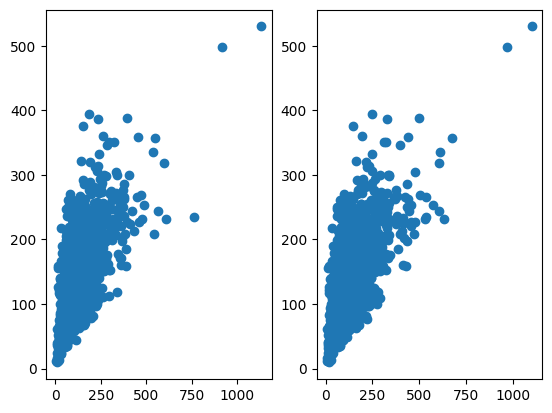

In [3]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(df[min_pred_col], df[target_col])
ax[1].scatter(df[vol_pred_col], df[target_col])

In [4]:
df['crt_kg'] = df['ucrt_u24_umol'] * 113.12 / 1000 / df['bwi']

In [5]:
cols = [
    min_pred_col, vol_pred_col,
    'crt_kg', 'k_dis',
    'u24_hours', 'un_hours', 'ud_hours',
    'u24_ml', 'un_ml', 'ud_ml',
    'una_u24_mmol', 'una_un_mmol', 'una_ud_mmol',
    'una_u24_mmolh', 'una_un_mmolh', 'una_ud_mmolh',
    'una_u24', 'una_un', 'una_ud',
]

In [6]:
df[cols].mean()

/tmp/ipykernel_123028/462284269.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[cols].mean()


una_un_mmol_norm_min_corr     130.567603
una_un_mmol_norm_vol_corr     139.033851
crt_kg                         19.471672
u24_hours                      23.930542
un_hours                        8.030545
ud_hours                       15.899996
u24_ml                       1685.008537
un_ml                         527.175299
ud_ml                        1157.833238
una_u24_mmol                  139.543178
una_un_mmol                    43.259366
una_ud_mmol                    96.283812
una_u24_mmolh                   5.841687
una_un_mmolh                    5.440317
una_ud_mmolh                    6.071824
una_u24                         0.092573
una_un                         92.745020
una_ud                         94.899260
dtype: float64

**Cases predicted with extreme high values: is there a common factor?**

In [7]:
sub = df[df[min_pred_col] > 700]
sub[cols]

,una_un_mmol_norm_min_corr,una_un_mmol_norm_vol_corr,crt_kg,k_dis,u24_hours,un_hours,ud_hours,u24_ml,un_ml,ud_ml,una_u24_mmol,una_un_mmol,una_ud_mmol,una_u24_mmolh,una_un_mmolh,una_ud_mmolh,una_u24,una_un,una_ud
750,914.005801,967.041850,65.365057,No,24.175503,7.900729,16.274773,4686.0,1592.0,3094.0,501.997986,300.888,201.110001,20.764738,38.083576,12.357162,0.107127,189.0,65.0
1334,1132.137931,1099.174152,58.053054,No,21.750000,7.250000,14.500000,3280.0,2000.0,1280.0,480.240000,342.000,138.240000,22.080000,47.172414,9.533793,0.146415,171.0,108.0
1678,763.392000,536.705526,20.064382,No,24.750000,5.250000,19.500000,1882.0,1176.0,706.0,241.828000,166.992,74.836000,9.770828,31.808000,3.837744,0.128495,142.0,106.0


In [8]:
sub = df[df[vol_pred_col] > 700]
sub[cols]

,una_un_mmol_norm_min_corr,una_un_mmol_norm_vol_corr,crt_kg,k_dis,u24_hours,un_hours,ud_hours,u24_ml,un_ml,ud_ml,una_u24_mmol,una_un_mmol,una_ud_mmol,una_u24_mmolh,una_un_mmolh,una_ud_mmolh,una_u24,una_un,una_ud
750,914.005801,967.041850,65.365057,No,24.175503,7.900729,16.274773,4686.0,1592.0,3094.0,501.997986,300.888,201.110001,20.764738,38.083576,12.357162,0.107127,189.0,65.0
1334,1132.137931,1099.174152,58.053054,No,21.750000,7.250000,14.500000,3280.0,2000.0,1280.0,480.240000,342.000,138.240000,22.080000,47.172414,9.533793,0.146415,171.0,108.0


In [9]:
df[~df['crt_kg'].isna()].sort_values(by='crt_kg')['crt_kg']

1253     6.049211
1320     7.560387
296      7.972189
324      8.004562
795      8.526968
          ...    
1334    58.053054
1024    58.129422
791     58.506631
629     59.637587
750     65.365057
Name: crt_kg, Length: 1754, dtype: float64

<AxesSubplot:>

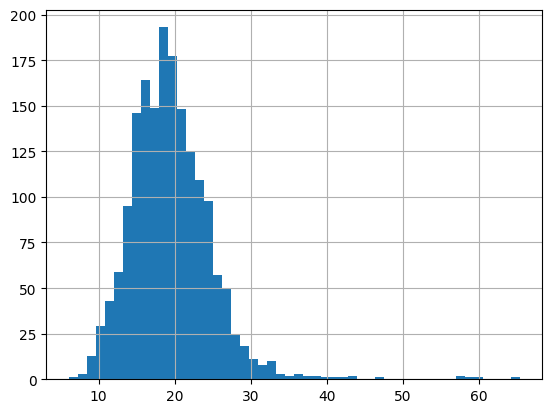

In [10]:
df[~df['crt_kg'].isna()]['crt_kg'].hist(bins=50)